In [1]:
from magma import *
import os
os.environ["MANTLE"] = "lattice"
from mantle import And, Or, XOr

class FullAdder(Circuit):
    name = "FullAdder"
    IO = ["a", In(Bit), "b", In(Bit), "cin", In(Bit), "out", Out(Bit), "cout", Out(Bit)]
    @classmethod
    def definition(io):
        # Generate the sum
        _sum = XOr(3)(io.a, io.b, io.cin)
        wire(_sum, io.out)
        # Generate the carry
        carry = Or(3)(And(2)(io.a, io.b), And(2)(io.b, io.cin), And(2)(io.a, io.cin))
        wire(carry, io.cout)

import mantle lattice ice40
import mantle lattice mantle40


In [2]:
from magma.backend.verilog import compile as compile_verilog

print(compile_verilog(FullAdder))

compiling XOr3
compiling Or3
compiling And2
compiling FullAdder
module XOr3 (input [2:0] I, output  O);
wire  inst0_O;
SB_LUT4 #(.LUT_INIT(16'h9696)) inst0 (.I0(I[0]), .I1(I[1]), .I2(I[2]), .I3(1'b0), .O(inst0_O));
assign O = inst0_O;
endmodule

module Or3 (input [2:0] I, output  O);
wire  inst0_O;
SB_LUT4 #(.LUT_INIT(16'hFEFE)) inst0 (.I0(I[0]), .I1(I[1]), .I2(I[2]), .I3(1'b0), .O(inst0_O));
assign O = inst0_O;
endmodule

module And2 (input [1:0] I, output  O);
wire  inst0_O;
SB_LUT4 #(.LUT_INIT(16'h8888)) inst0 (.I0(I[0]), .I1(I[1]), .I2(1'b0), .I3(1'b0), .O(inst0_O));
assign O = inst0_O;
endmodule

module FullAdder (input  a, input  b, input  cin, output  out, output  cout);
wire  inst0_O;
wire  inst1_O;
wire  inst2_O;
wire  inst3_O;
wire  inst4_O;
XOr3 inst0 (.I({cin,b,a}), .O(inst0_O));
Or3 inst1 (.I({inst4_O,inst3_O,inst2_O}), .O(inst1_O));
And2 inst2 (.I({b,a}), .O(inst2_O));
And2 inst3 (.I({cin,b}), .O(inst3_O));
And2 inst4 (.I({cin,a}), .O(inst4_O));
assign out = inst0_O;
assi

In [3]:
from magma.simulator.python_simulator import testvectors

test_vectors = [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [1, 1, 1, 1, 1]
]

tests = testvectors(FullAdder)
print(tests)
print( "Success" if tests == test_vectors else "Failure" )

[[0, 0, 0, 0, 0], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [1, 0, 1, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 1, 1]]
Success


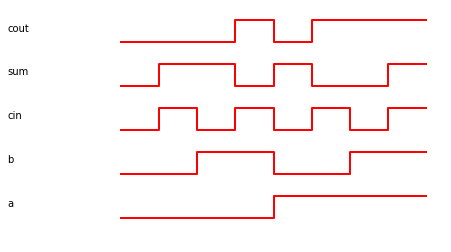

In [4]:
from magma.waveform import waveform

waveform(tests, ["a", "b", "cin", "sum", "cout"])